# Análisis Exploratorio
Grupo: Biblion'Data <br/>
Integrantes:
- Luis Fiallos
- Eddy Calderón
- Erick Pulla

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from itertools import combinations
import networkx as nx
%matplotlib inline

In [23]:
df = pd.read_csv('papersDataScience.csv')

<strong>Datos de PIB Mundial extraidos de WorldBank.org </strong> <br />
Link: https://datos.bancomundial.org/indicador/NY.GDP.MKTP.CD

In [24]:
df_pib = pd.read_csv('PIB_per_Country.csv')

## Exploración de los Datasets

### Dataset de papers

In [7]:
# Las primeras 5 rows del dataset de papers
df.head()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,topic,year
0,2-s2.0-85104204626,10.1525/cse.2018.001552,NaN,NaN,"Returning water data to communities in Ndola, ...",ar,Article,Chitondo M.,60020585,University of Canterbury,...,NaN,Many scientific research projects carried out ...,NaN,0,0,UC,undefined,University of Canterbury,DataScience,2019
1,2-s2.0-85104191635,10.1525/cse.2018.001578,NaN,NaN,Ignoring quantitative reasoning: The initial e...,ar,Article,Bothun G.D.,60012317,University of Oregon,...,NaN,The initial estimate of the flow rate of now l...,NaN,0,0,NaN,undefined,NaN,DataScience,2019
2,2-s2.0-85091697725,10.1093/poq/nfz050,NaN,NaN,Erratum: The polls-trends: Americans' trust in...,er,Erratum,Krause N.M.,NaN,NaN,...,181,In the article “The Polls-Trends: Americans' T...,NaN,0,0,NaN,undefined,NaN,DataScience,2019
3,2-s2.0-85091392304,10.22478/ufpb.1809-4783.2019v29n4.50113,NaN,NaN,Open access in question: New agendas and chall...,re,Review,Appel A.L.,60007639;60000036,Instituto Brasileiro de Informacao Em Ciencia ...,...,187-208,After almost twenty years of the Budapest Open...,Open access | Open science | Platforms | Schol...,0,1,FAPERJ,E-26/201.428/2014,Fundação Carlos Chagas Filho de Amparo à Pesqu...,DataScience,2019
4,2-s2.0-85091384820,10.22478/ufpb.1809-4783.2019v29n4.47536,NaN,NaN,Interdisciplinarity in data science over big d...,ar,Article,Pinto V.A.,60033296;60008088;60006429;60000036,Universidade FUMEC;Universidade de Sao Paulo -...,...,61-74,Data Science and Big Data are leveraged by bus...,Big data | Data science | Interdisciplinarity ...,0,1,NaN,undefined,NaN,DataScience,2019


In [8]:
# Información acerca de las columnas o features del dataset de papers (tipos de datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57573 entries, 0 to 57572
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eid                  57573 non-null  object 
 1   doi                  52341 non-null  object 
 2   pii                  7417 non-null   object 
 3   pubmed_id            16945 non-null  float64
 4   title                57573 non-null  object 
 5   subtype              57573 non-null  object 
 6   subtypeDescription   57418 non-null  object 
 7   creator              56690 non-null  object 
 8   afid                 55922 non-null  object 
 9   affilname            55922 non-null  object 
 10  affiliation_city     55517 non-null  object 
 11  affiliation_country  55866 non-null  object 
 12  author_count         56690 non-null  float64
 13  author_names         56690 non-null  object 
 14  author_ids           56690 non-null  object 
 15  author_afids         56402 non-null 

In [9]:
# Columnas del dataset de papers
df.columns

Index(['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'fund_acr', 'fund_no', 'fund_sponsor', 'topic', 'year'],
      dtype='object')

### Dataset de PIB

In [10]:
# Primeras 5 filas del dataset del PIB
df_pib.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.929193e+10,1.970186e+10,2.147035e+10,2.570500e+10,2.350165e+10,2.678117e+10,...,9.131974e+11,9.276555e+11,9.563187e+11,8.930997e+11,8.547519e+11,9.622690e+11,9.840320e+11,9.778092e+11,8.984741e+11,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,NaN


Para simplificar el dataset, solo usaremos las columnas Country Name, Country Code, 2018, 2019 y 2020 (las columnas de los años indican el PIB por año)

In [11]:
df_pib = df_pib[["Country Name", "Country Code", "2018", "2019", "2020"]]
df_pib.head(5)

,Country Name,Country Code,2018,2019,2020
0,Aruba,ABW,3.202189e+09,NaN,NaN
1,NaN,AFE,9.840320e+11,9.778092e+11,8.984741e+11
2,Afganistán,AFG,1.835388e+10,1.929110e+10,1.980707e+10
3,NaN,AFW,7.381313e+11,7.920789e+11,7.865850e+11
4,Angola,AGO,1.013532e+11,8.941719e+10,6.230691e+10


In [12]:
# Columnas del dataset de PIB
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  266 non-null    object 
 2   2018          254 non-null    float64
 3   2019          247 non-null    float64
 4   2020          223 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.4+ KB


## Overview de los datasets

### Dataset de papers

In [13]:
# Features destacados
df[['doi','title','subtype','subtypeDescription','creator','affilname','affiliation_city','affiliation_country',
'author_count','author_names','coverDate','coverDisplayDate','publicationName','aggregationType','authkeywords','citedby_count',
'openaccess','year']].head()

,doi,title,subtype,subtypeDescription,creator,affilname,affiliation_city,affiliation_country,author_count,author_names,coverDate,coverDisplayDate,publicationName,aggregationType,authkeywords,citedby_count,openaccess,year
0,10.1525/cse.2018.001552,"Returning water data to communities in Ndola, ...",ar,Article,Chitondo M.,University of Canterbury,Christchurch,New Zealand,2.0,"Chitondo, Mando;Dombroski, Kelly",2019-12-31,31 December 2019,Case Studies in the Environment,Journal,NaN,0,0,2019
1,10.1525/cse.2018.001578,Ignoring quantitative reasoning: The initial e...,ar,Article,Bothun G.D.,University of Oregon,Eugene,United States,1.0,"Bothun, Gregory D.",2019-12-31,31 December 2019,Case Studies in the Environment,Journal,NaN,0,0,2019
2,10.1093/poq/nfz050,Erratum: The polls-trends: Americans' trust in...,er,Erratum,Krause N.M.,NaN,NaN,NaN,1.0,"Krause, Nicole M.",2019-12-31,1 March 2020,Public Opinion Quarterly,Journal,NaN,0,0,2019
3,10.22478/ufpb.1809-4783.2019v29n4.50113,Open access in question: New agendas and chall...,re,Review,Appel A.L.,Instituto Brasileiro de Informacao Em Ciencia ...,Brasilia;Rio de Janeiro,Brazil;Brazil,2.0,"Appel, André Luiz;Albagli, Sarita",2019-12-31,31 December 2019,Informacao e Sociedade,Journal,Open access | Open science | Platforms | Schol...,0,1,2019
4,10.22478/ufpb.1809-4783.2019v29n4.47536,Interdisciplinarity in data science over big d...,ar,Article,Pinto V.A.,Universidade FUMEC;Universidade de Sao Paulo -...,Belo Horizonte;Sao Paulo;Koblenz am Rhein;Rio ...,Brazil;Brazil;Germany;Brazil,4.0,"Pinto, Vitor Afonso;Cardoso, Ana Maria Pereira...",2019-12-31,31 December 2019,Informacao e Sociedade,Journal,Big data | Data science | Interdisciplinarity ...,0,1,2019


Text(0, 0.5, 'Porcentaje de los papers por año')

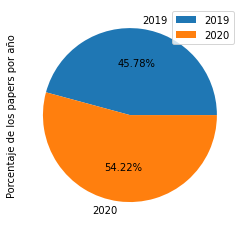

In [14]:
(df[["title", "year"]].groupby("year").count() / len(df) * 100).plot.pie(autopct="%.2f%%", subplots=True)
plt.ylabel("Porcentaje de los papers por año")

El 54.2% de los datos pertenecen a papers del 2020, mientras que el 45.8% de los papers pertenecen al 2019.

In [15]:
percentage_by_type = df[["title", "aggregationType"]].groupby("aggregationType").count() / len(df) * 100
percentage_by_type

,title
aggregationType,
Book,1.097737
Book Series,6.030605
Conference Proceeding,18.508676
Journal,74.244872
Trade Journal,0.118111


Como se puede observar tanto en la tabla de arriba como el gráfico de abajo, la mayoría de los papers (más del 70%) de los papers son de tipo <strong>Journal</strong>. 

Text(0, 0.5, 'Porcentaje de los tipos de documentos')

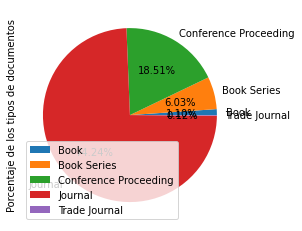

In [16]:
percentage_by_type.plot.pie(autopct="%.2f%%", subplots=True)
plt.ylabel("Porcentaje de los tipos de documentos")

In [19]:
df_countries = df.explode("affiliation_country", ignore_index=True)
df_countries[["affiliation_country"]]

,affiliation_country
0,New Zealand
1,United States
2,NaN
3,Brazil
4,Brazil
...,...
143162,United States
143163,Italy
143164,Spain
143165,Switzerland


In [47]:
percentage_by_country = df_countries[["title", "affiliation_country"]].groupby("affiliation_country").count() / len(df_countries) * 100
percentage_by_country.sort_values(by="title", inplace=True, ascending=False)
percentage_by_country

,title
affiliation_country,
United States,7.772741
China,5.917704
United States;United States,4.396158
China;China,3.317527
India,2.468171
...,...
Iran;Iran;Iraq,0.001737
Iran;Iran;Iran;United States;United States;Iran;Iran,0.001737
Iran;Iran;Iran;United States;United Kingdom;Italy;France;United States;Iran;United States;United States;United States,0.001737


La mayor cantidad de papers contienen autores que se ubican principalmente en Estados Unidos, con una cantidad aproximada de 22.1%

### Dataset de PIB

In [18]:
df_pib.isna().sum()

Country Name     2
Country Code     0
2018            12
2019            19
2020            43
dtype: int64

Se observa que en el dataset de los PIBs mundiales, todos los países poseen su código (Country Code), 2 países no poseen su nombre (Country Name). <br />
Para los PIBs, en el 2018 hay 12 datos faltantes, para el 2019, hay 19 datos faltantes y para el 2020, hay 43 datos faltantes para ciertos países.

In [19]:
df_pib[df_pib.isna().any(axis=1)]

,Country Name,Country Code,2018,2019,2020
0,Aruba,ABW,3.202189e+09,NaN,NaN
1,NaN,AFE,9.840320e+11,9.778092e+11,8.984741e+11
3,NaN,AFW,7.381313e+11,7.920789e+11,7.865850e+11
6,Andorra,AND,3.218316e+09,3.155065e+09,NaN
8,Emiratos Árabes Unidos,ARE,4.222150e+11,4.211423e+11,NaN
11,Samoa Americana,ASM,6.410000e+08,6.380000e+08,NaN
22,Bahrein,BHR,3.765250e+10,3.847452e+10,NaN
27,Bermudas,BMU,7.224329e+09,7.484113e+09,NaN
38,Islas del Canal,CHI,NaN,NaN,NaN
50,Cuba,CUB,1.000500e+11,1.031310e+11,NaN


In [20]:
df_pib=df_pib.dropna(subset=["Country Name","2018",'2019', '2020'])
df_pib

,Country Name,Country Code,2018,2019,2020
2,Afganistán,AFG,1.835388e+10,1.929110e+10,1.980707e+10
4,Angola,AGO,1.013532e+11,8.941719e+10,6.230691e+10
5,Albania,ALB,1.514702e+10,1.528661e+10,1.479962e+10
7,El mundo árabe,ARB,2.758001e+12,2.811182e+12,2.530186e+12
9,Argentina,ARG,5.176267e+11,4.454452e+11,3.830670e+11
...,...,...,...,...,...
260,Samoa,WSM,8.214961e+08,8.522502e+08,8.070272e+08
261,Kosovo,XKX,7.942962e+09,7.953156e+09,7.611402e+09
263,Sudáfrica,ZAF,3.682889e+11,3.514316e+11,3.019236e+11
264,Zambia,ZMB,2.631164e+10,2.330869e+10,1.932005e+10


In [47]:
# Le hacemos un melt al dataset de PIB para tener en una sola columna 
df_pib_melted = df_pib.melt(id_vars=["Country Name", "Country Code"], value_vars=["2018", "2019", "2020"], var_name="year", value_name="PIB")
df_pib_melted

,Country Name,Country Code,year,PIB
0,Aruba,ABW,2018,3.202189e+09
1,NaN,AFE,2018,9.840320e+11
2,Afganistán,AFG,2018,1.835388e+10
3,NaN,AFW,2018,7.381313e+11
4,Angola,AGO,2018,1.013532e+11
...,...,...,...,...
793,Kosovo,XKX,2020,7.611402e+09
794,"Yemen, Rep. del",YEM,2020,NaN
795,Sudáfrica,ZAF,2020,3.019236e+11
796,Zambia,ZMB,2020,1.932005e+10


In [26]:
countries = list(pycountry.countries)
country_codes = []
for country in countries:
    country_codes.append(country.alpha_3)
country_codes[:10]

['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM']

In [27]:
def drop_not_countries(x):
    if x["Country Code"] in country_codes:
        return x
df_pib_melted = df_pib_melted.transform(drop_not_countries, axis=1)
df_pib_melted = df_pib_melted.dropna(subset=["Country Name"])
df_pib_melted.groupby(["Country Code","year"]).head()

,Country Name,Country Code,year,PIB
0,Afganistán,AFG,2018,18353881129.524601
1,Angola,AGO,2018,101353230784.593994
2,Albania,ALB,2018,15147020535.3869
4,Argentina,ARG,2018,517626700412.88501
5,Armenia,ARM,2018,12457941907.0333
...,...,...,...,...
656,Vanuatu,VUT,2020,854793640.145606
658,Samoa,WSM,2020,807027244.42138
660,Sudáfrica,ZAF,2020,301923639269.552002
661,Zambia,ZMB,2020,19320053859.278999


Text(0.5, 1.0, 'Top 13 países con mayor PIB entre el 2018, 2019 y 2020')

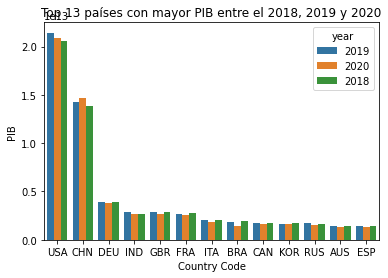

In [28]:
sns.barplot(data=df_pib_melted.sort_values(by="PIB", ascending=False).head(39), x="Country Code", y="PIB", hue="year")
plt.title("Top 13 países con mayor PIB entre el 2018, 2019 y 2020")

Se puede observar que el PIB más alto lo posee USA con un valor mayor al 25% del segundo mejor país tanto para los años 2018, 2019 y 2020

## Análisis de outliers

In [29]:
df.author_count.quantile(0.25)

2.0

In [30]:
df.author_count.quantile(0.75)

6.0

In [31]:
outliers_author_count=df[['title','author_count']].loc[df['author_count']>df.author_count.quantile(0.75)+1.5*(df.author_count.quantile(0.75)-df.author_count.quantile(0.25))]
outliers_author_count

,title,author_count
65,Implementation research for public sector ment...,20.0
76,The Atmospheric River Tracking Method Intercom...,37.0
156,Phosphoproteomics Enables Molecular Subtyping ...,22.0
157,A High-Quality Melon Genome Assembly Provides ...,17.0
181,An Arctic watershed observatory at Lake Peters...,16.0
...,...,...
57297,Teaching graduate students how to review resea...,22.0
57332,"Eight urgent, fundamental and simultaneous ste...",15.0
57334,Macroecology in the age of Big Data – Where to...,13.0
57399,EULAR points to consider for the use of big da...,14.0


In [32]:
porcentaje_out_author=outliers_author_count.title.count()/df.title.count()*100
porcentaje_out_author

3.425216681430532

El 3.4 % de los registros del dataset son outliers para la variable author_count

In [33]:
df.citedby_count.quantile(0.25)

0.0

In [34]:
df.citedby_count.quantile(0.75)

4.0

In [35]:
outliers_citedby_count=df[['title','citedby_count']].loc[df['citedby_count']>df.citedby_count.quantile(0.75)+1.5*(df.citedby_count.quantile(0.75)-df.citedby_count.quantile(0.25))]
outliers_citedby_count

,title,citedby_count
10,Feature extraction and elimination using machi...,22
13,What is machine learning? A primer for the epi...,33
15,THE POLLS-Trends - Americans' Trust in Science...,16
28,Decompressive craniectomy for the treatment of...,31
52,A systematic survey of computer-aided diagnosi...,35
...,...,...
57566,Texture model regression for effective feature...,33
57567,Geopressure prediction using seismic data: Cur...,176
57568,Actual problems of hygiene science and practic...,16
57571,Potential coordinate mislocations in crosshole...,35


In [36]:
porcentaje_out_citedby=outliers_citedby_count.title.count()/df.title.count()*100
porcentaje_out_citedby

8.377190697028121

El 8.3 % de los registros del dataset son outliers para la variable citedby_count

## Análisis de variables categóricas

### Pregunta 1: ¿Como ha variado la publicación de papers del año 2019 al 2020 según el tipo de documento publicado?

In [6]:
aggre_values=pd.unique(df['aggregationType'])

In [157]:
# Revisamos nuestras principales variables categoricas las cuales clasifican cada paper por su tipo
cuenta_agrtype=df[['aggregationType','year','title']].groupby(['aggregationType','year']).count()
cuenta_agrtype

title
aggregationType       year       
Book                  2019    461
                      2020    171
Book Series           2019   1545
                      2020   1927
Conference Proceeding 2019   5149
                      2020   5507
Journal               2019  19164
                      2020  23581
Trade Journal         2019     40
                      2020     28

Text(0, 0.5, 'Count')

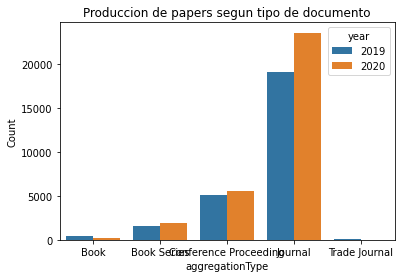

In [159]:
cuenta_type=df[['aggregationType','year','title']].groupby(['aggregationType','year']).count().reset_index()
sns.barplot(data=cuenta_type, x="aggregationType", y="title", hue="year")
plt.title("Producción de papers según tipo de documento")
plt.ylabel("Count")

Respuesta(s):
- Se puede observar que el tipo de documento en el que hay más instancias de papers es el Journal tanto para el 2019 como para el 2020.
- En cuanto a la variación, se puede observar que todos han tenido un aumento en cuanto a la producción de papers, excepto el tipo de documento Book y Trade Journal.​
- El tipo de documento que más afectación tuvo fue Journal, con un porcentaje de aumento mayor al 30%.

In [111]:
porcentajes=[]
for tipo in aggre_values:
    x=100*(cuenta_agrtype.loc[(tipo,2020),'title']-cuenta_agrtype.loc[(tipo,2019),'title'])/cuenta_agrtype.loc[(tipo,2019),'title']
    porcentajes.append(x)
porcentajes

[23.04842412857441,
 6.952806370168965,
 -62.906724511930584,
 24.72491909385113,
 -30.0]

In [116]:
df_porcentajes=pd.DataFrame(porcentajes)
df_porcentajes['Tipo']=aggre_values
df_porcentajes

,0,Tipo
0,23.048424,Journal
1,6.952806,Conference Proceeding
2,-62.906725,Book
3,24.724919,Book Series
4,-30.000000,Trade Journal


In [75]:
cuenta_subtype=df[['subtypeDescription','year','title']].groupby(['subtypeDescription','year']).count()
cuenta_subtype

title
subtypeDescription year       
Article            2019  14723
                   2020  17930
Book               2019    133
                   2020     67
Chapter            2019    637
                   2020    449
Conference Paper   2019   6089
                   2020   6817
Conference Review  2019    320
                   2020    322
Editorial          2019    141
                   2020    173
Erratum            2019    303
                   2020    506
Letter             2019     50
                   2020     62
Note               2019    186
                   2020    162
Review             2019   3671
                   2020   4609
Short Survey       2019     35
                   2020     33

### Pregunta 2: ¿Qué países presentan una mayor afectación en la publicación de papers del último año tras los sucesos de la pandemia del COVID-19?

In [27]:
def split(x):
    if pd.isnull(x):
        return []
    return str(x).split(";")
df["affiliation_country"] = df["affiliation_country"].apply(split)
df[["affiliation_country"]]

,affiliation_country
0,[New Zealand]
1,[United States]
2,[]
3,"[Brazil, Brazil]"
4,"[Brazil, Brazil, Germany, Brazil]"
...,...
57568,[Russian Federation]
57569,"[Germany, Germany, United States]"
57570,"[Italy, Spain]"
57571,[Switzerland]


<h3>Obtenemos el país de publicación:</h3>
Lo guardamos en el campo "published_country"

In [28]:
def get_published_country(x):
    if len(x) != 0:
        return x[0]
df["published_country"] = df["affiliation_country"].apply(get_published_country)
df[["published_country"]]

,published_country
0,New Zealand
1,United States
2,None
3,Brazil
4,Brazil
...,...
57568,Russian Federation
57569,Germany
57570,Italy
57571,Switzerland


In [48]:
groupbycountry = df[["published_country", "year", "title"]].groupby(["published_country", "year"]).count().sort_values(by="title", ascending=False).reset_index()
groupbycountry.head(10)

,published_country,year,title
0,United States,2020,5645
1,United States,2019,5544
2,China,2020,4754
3,China,2019,2897
4,United Kingdom,2020,1564
5,United Kingdom,2019,1431
6,India,2020,1316
7,Iran,2020,1201
8,India,2019,1125
9,Germany,2020,1084


Text(0, 0.5, 'Count')

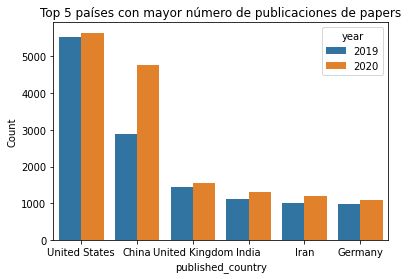

In [49]:
# ¿Qué países presentan una mayor afectación en la publicación de papers del último año tras los sucesos de la pandemia del COVID-19?
groupbycountry = df[["published_country", "year", "title"]].groupby(["published_country", "year"]).count().sort_values(by="title", ascending=False).reset_index()
sns.barplot(data=groupbycountry.head(12), x="published_country", y="title", hue="year")
plt.title("Top 5 países con mayor número de publicaciones de papers")
plt.ylabel("Count")

Respuesta(s):
- Se incrementó entre un 3% a un 8% el número de publicaciones en países como USA, UK, Iran, India y Alemania
- Podemos evidenciar un gran aumento de publicaciones de papers en China, país que se tornó el centro de la pandemia.

### Pregunta 3: ¿De qué manera cambia el número de papers publicados a lo largo de los meses y cómo esto cambia del año 2019 al 2020? ¿Hay algún cambio significativo?

In [161]:
df["month"] = pd.to_datetime(df["coverDate"]).dt.month_name()
df.head()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,topic,year,month
0,2-s2.0-85104204626,10.1525/cse.2018.001552,NaN,NaN,"Returning water data to communities in Ndola, ...",ar,Article,Chitondo M.,60020585,University of Canterbury,...,Many scientific research projects carried out ...,NaN,0,0,UC,undefined,University of Canterbury,DataScience,2019,December
1,2-s2.0-85104191635,10.1525/cse.2018.001578,NaN,NaN,Ignoring quantitative reasoning: The initial e...,ar,Article,Bothun G.D.,60012317,University of Oregon,...,The initial estimate of the flow rate of now l...,NaN,0,0,NaN,undefined,NaN,DataScience,2019,December
2,2-s2.0-85091697725,10.1093/poq/nfz050,NaN,NaN,Erratum: The polls-trends: Americans' trust in...,er,Erratum,Krause N.M.,NaN,NaN,...,In the article “The Polls-Trends: Americans' T...,NaN,0,0,NaN,undefined,NaN,DataScience,2019,December
3,2-s2.0-85091392304,10.22478/ufpb.1809-4783.2019v29n4.50113,NaN,NaN,Open access in question: New agendas and chall...,re,Review,Appel A.L.,60007639;60000036,Instituto Brasileiro de Informacao Em Ciencia ...,...,After almost twenty years of the Budapest Open...,Open access | Open science | Platforms | Schol...,0,1,FAPERJ,E-26/201.428/2014,Fundação Carlos Chagas Filho de Amparo à Pesqu...,DataScience,2019,December
4,2-s2.0-85091384820,10.22478/ufpb.1809-4783.2019v29n4.47536,NaN,NaN,Interdisciplinarity in data science over big d...,ar,Article,Pinto V.A.,60033296;60008088;60006429;60000036,Universidade FUMEC;Universidade de Sao Paulo -...,...,Data Science and Big Data are leveraged by bus...,Big data | Data science | Interdisciplinarity ...,0,1,NaN,undefined,NaN,DataScience,2019,December


In [162]:
groupby_month = df[["month", "year", "title"]].groupby(["year", "month"]).count().sort_values(by="title", ascending=False).reset_index()
groupby_month

,year,month,title
0,2020,January,10679
1,2019,January,9709
2,2020,December,2752
3,2020,October,2154
4,2020,September,2138
5,2019,December,1998
6,2020,June,1989
7,2020,July,1916
8,2020,November,1887
9,2020,August,1849


Text(0.5, 1.0, 'Número de papers por mes')

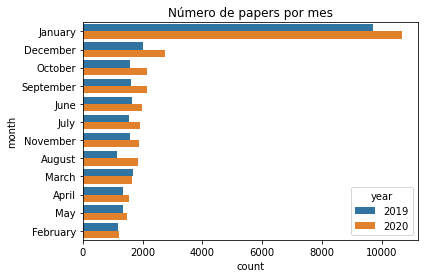

In [164]:
sns.barplot(data=groupby_month, x="title", y="month", hue="year")
plt.xlabel("count")
plt.title("Número de papers publicados por mes")

Respuesta(s): <br/>
- Del año 2019 al 2020 existe un incremento en la producción de papers de aproximadamente 20% en promedio.

- Adicionalmente, se puede observar como Enero es el mes de mayor producción durante los 2 años, ocupando más del 70% de las publicaciones anuales, mientras que el resto de meses mantienen una produccion similar con un valor alrededor de las 2000 publicaciones por mes.

### Utilizando geopandas (en construcción)

In [39]:
import pycountry

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3 # .alpha_3 means 3-letter country code 
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [53]:
df_countries['CODE'] = alpha3code(df_countries["affiliation_country"])
df_countries[["affiliation_country", "CODE"]].head()

,affiliation_country,CODE
0,New Zealand,NZL
1,United States,USA
2,NaN,None
3,Brazil;Brazil,None
4,Brazil;Brazil;Germany;Brazil,None


In [58]:
# Extrayendo los puntos de geometria y latitud y longitud
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [62]:
# Hacemos un merge con nuestros datos para obtener la geometria de los paises
merge = pd.merge(world, df_countries, on="CODE")
merge[['continent', 'name', 'CODE', 'gdp_md_est', 'geometry', 'affiliation_country']].head()

,continent,name,CODE,gdp_md_est,geometry,affiliation_country
0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
2,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
3,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
4,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji


In [64]:
# Hacemos un merge con un dataset externo para obtener la latitud y longitud
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name')
merge[['continent', 'name', 'CODE', 'gdp_md_est', 'geometry', 'latitude', 'longitude']].head()

,continent,name,CODE,gdp_md_est,geometry,latitude,longitude
0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-16.578193,179.414413
1,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-16.578193,179.414413
2,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-16.578193,179.414413
3,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-16.578193,179.414413
4,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-16.578193,179.414413


In [94]:
# Obtenemos el conteo por países para el año 2020
new_merge = merge[["CODE", 'title']].groupby("CODE").count().reset_index().merge(merge, on="CODE")
new_merge = new_merge[['continent', 'name', 'CODE', 'gdp_md_est', 'geometry', 'latitude', 'longitude', 'title_x']]
new_merge.drop_duplicates(subset=['CODE'])
new_merge = new_merge.sort_values(by="title_x", ascending=False).reset_index()

c:\python38\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\python38\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


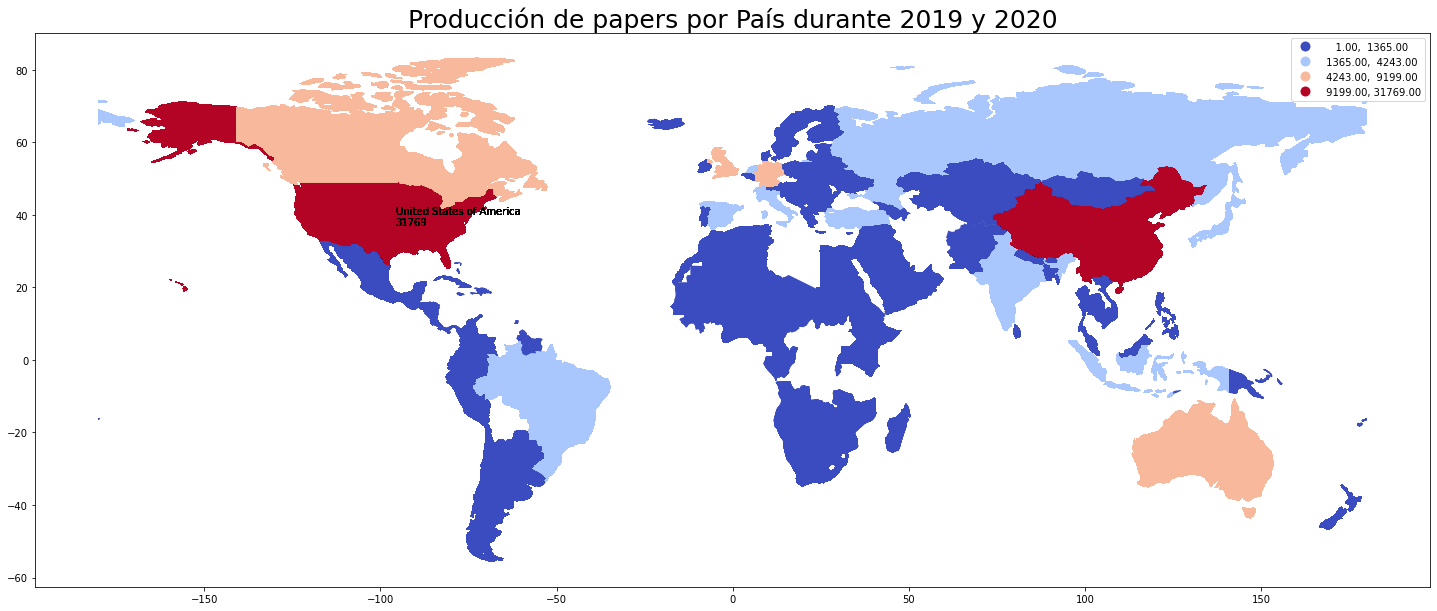

In [95]:
from geopandas import GeoDataFrame
new_merge = GeoDataFrame(new_merge)
new_merge.plot(column="title_x", scheme="quantiles",
            figsize=(25, 20),
            legend=True,cmap='coolwarm')
plt.title('Producción de papers por País durante 2019 y 2020',fontsize=25)
for i in range(0,10):
    plt.text(float(new_merge.longitude[i]),float(new_merge.latitude[i]),"{}\n{}".format(new_merge.name[i],new_merge.title_x[i]),size=10)
plt.show()

Se puede observar los países que más producción de papers han tenido durante los años 2019 y 2020 en un mapa de colores.

## Análisis de variables numéricas

In [9]:
# Realizamos un revision preliminar sobre la informacion estadistica de nuestros datos numericos
df.describe()

,pubmed_id,author_count,source_id,citedby_count,openaccess,year
count,1.694500e+04,56690.000000,5.757100e+04,57573.000000,57573.000000,57573.000000
mean,3.178742e+07,4.804216,1.015326e+10,4.543606,0.415351,2019.542164
std,9.212943e+05,5.416942,9.999914e+09,83.702690,0.492787,0.498223
min,2.267396e+07,1.000000,1.200100e+04,0.000000,0.000000,2019.000000
25%,3.108726e+07,2.000000,2.493950e+04,0.000000,0.000000,2019.000000
50%,3.178054e+07,4.000000,5.800170e+09,1.000000,0.000000,2020.000000
75%,3.255278e+07,6.000000,2.110041e+10,4.000000,1.000000,2020.000000
max,3.416510e+07,100.000000,2.110105e+10,16483.000000,1.000000,2020.000000


<AxesSubplot:xlabel='subtype', ylabel='author_count'>

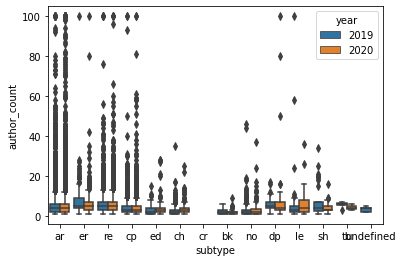

In [5]:
# Analizamos como se comporta la variable author_count respecto al tipo de documento y año de publicacion
sns.boxplot(x='subtype',y='author_count',hue='year',data=df)

<AxesSubplot:xlabel='subtype', ylabel='author_count'>

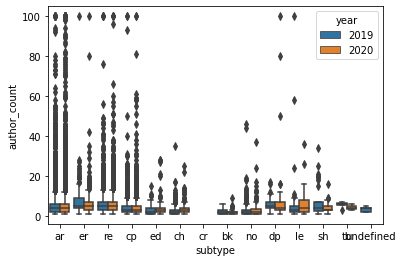

In [115]:
sns.boxplot(x='subtype',y='author_count',hue='year',data=df)

<strong> Se puede observar que existe una gran cantidad de outliers en nuestro primer analisis exploratorio de datos <strong/>

<AxesSubplot:xlabel='subtype', ylabel='citedby_count'>

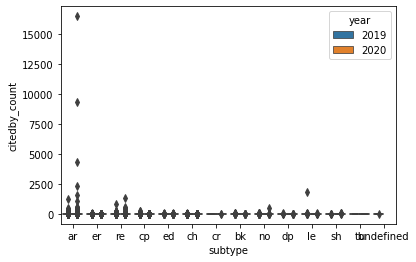

In [71]:
#Analizamos como se comporta la variable citedby_count respecto al tipo de documento y año de publicacion
sns.boxplot(x='subtype',y='citedby_count',hue='year',data=df)

<AxesSubplot:xlabel='aggregationType', ylabel='citedby_count'>

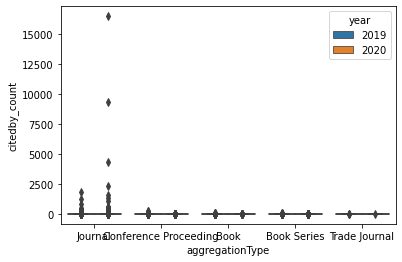

In [14]:
sns.boxplot(x='aggregationType',y='citedby_count',hue='year',data=df)

<strong>Para esta variable tambien se aprecia una cantidad considerable de outliers</strong>

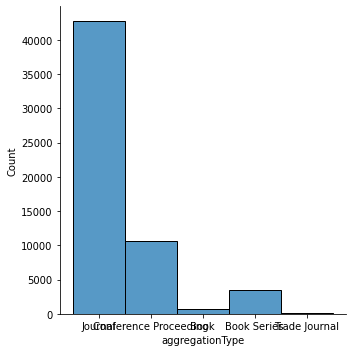

In [118]:
sns.displot(df['aggregationType'])

<strong>El tipo de documento que mayor número de instancias tiene son los de tipo Journal</strong>

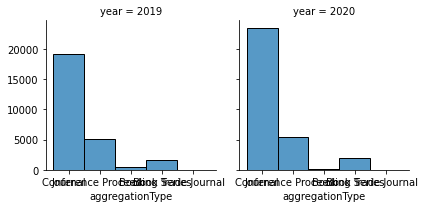

In [67]:
g=sns.FacetGrid(df,col='year')
g.map(sns.histplot,'aggregationType')

<strong>Los tipos de documentos siguen la misma distribución en los años 2019 y 2020, aunque presentan mayor cantidad en el año 2020</strong>

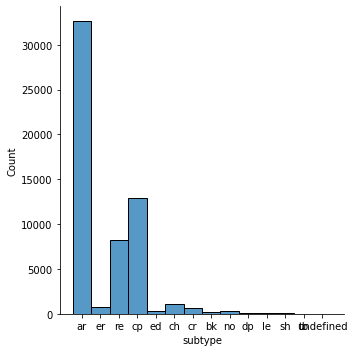

In [91]:
sns.displot(df['subtype'])

<strong>El subtipo de documento que mayor número de instancias tiene son los de tipo AR</strong>

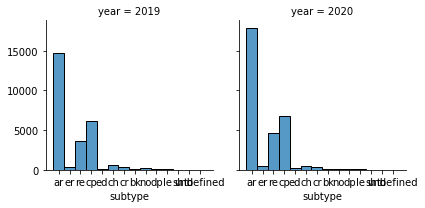

In [68]:
gr=sns.FacetGrid(df,col='year')
gr.map(sns.histplot,'subtype')

<strong>Los subtipos de documentos siguen la misma distribución en los años 2019 y 2020, aunque presentan mayor cantidad en el año 2020</strong>

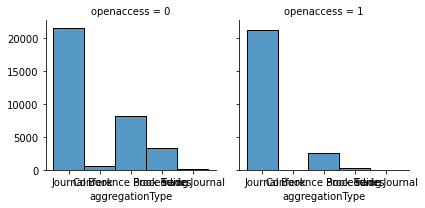

In [88]:
g=sns.FacetGrid(df,col='openaccess')
g.map(sns.histplot,'aggregationType')

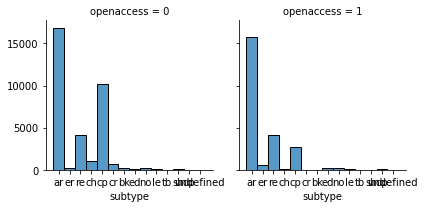

In [89]:
gr=sns.FacetGrid(df,col='openaccess')
gr.map(sns.histplot,'subtype')

<strong>Basado en la gran cantidad de outliers presentes en las variables numericas surgió el interés de conocer cual fue el paper más citado por año, asi se obtuvo el siguiente resultado <strong/>

In [160]:
indices=df.groupby(['year'])['citedby_count'].transform(max)==df['citedby_count']
df[indices]

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,topic,year
7593,2-s2.0-85069676260,10.1038/s41587-019-0209-9,NaN,31341288.0,"Reproducible, interactive, scalable and extens...",le,Letter,Bolyen E.,60159889;60121672;60121653;60121598;60121568;6...,ANU Research School of Biology;Center for Micr...,...,852-857,NaN,NaN,1863,0,NSF,APP1085372,National Science Foundation,DataScience,2019
45899,2-s2.0-85078262578,10.1016/S0140-6736(20)30183-5,S0140673620301835,31986264.0,Clinical features of patients infected with 20...,ar,Article,Huang C.,60122793;60122792;60122781;60122389;60121987;6...,"Institute of Laboratory Animal Sciences, Chine...",...,497-506,Background: A recent cluster of pneumonia case...,NaN,16483,1,MOST,CIFMS 2018-I2M-1-003,Ministry of Science and Technology of the Peop...,DataScience,2020


<strong>Como se observa en el año 2020 el paper más citado fue 'Clinical features of patients infected with 2019 novel coronavirus in Wuhan, China (thelancet.com)', un tema que se ha vuelto popular debido a la pandemia del COVID-19 y que supera en gran medida el número de citas realizadas respecto al año anterior <strong/>

## Grafos
### Pregunta 4: Si se hace un grafo de los keywords que co-ocurren dentro de publicaciones del dataset, ¿Cuáles han sido los principales enfoques de investigación dentro de los últimos meses?

### Analisis Grafo: Alemania

In [78]:
keywords_GER = [] # Nodos de los keywords de Alemania
keywords_GER_edges = [] # Edges de Alemania
for k in df.loc[df["published_country"]=="Germany", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_GER_edges += list(combinations(k, 2))
keywords_GER_edges

[('clinical effectiveness', 'meta-analysis'),
 ('clinical effectiveness', 'stemless'),
 ('clinical effectiveness', 'stemmed'),
 ('clinical effectiveness', 'total shoulder arthroplasty'),
 ('meta-analysis', 'stemless'),
 ('meta-analysis', 'stemmed'),
 ('meta-analysis', 'total shoulder arthroplasty'),
 ('stemless', 'stemmed'),
 ('stemless', 'total shoulder arthroplasty'),
 ('stemmed', 'total shoulder arthroplasty'),
 ('research networks', 'research trends'),
 ('research networks', 'sustainable energy'),
 ('research networks', 'text mining'),
 ('research networks', 'topic modeling'),
 ('research trends', 'sustainable energy'),
 ('research trends', 'text mining'),
 ('research trends', 'topic modeling'),
 ('sustainable energy', 'text mining'),
 ('sustainable energy', 'topic modeling'),
 ('text mining', 'topic modeling'),
 ('biological sciences', 'integrative aspects of cell biology'),
 ('biological sciences', 'molecular biology'),
 ('biological sciences', 'molecular interaction'),
 ('biolog

In [79]:
keyword_graph_GER = nx.Graph()
keyword_graph_GER.add_edges_from(keywords_GER_edges)

In [81]:
# Clustering coeficient
cof_real_GER = nx.average_clustering(keyword_graph_GER)
print(f'Real: ', cof_real_GER)

Real:  0.9172897846174658


In [56]:
list_tuples = nx.betweenness_centrality(keyword_graph_GER, normalized=True).items()

In [58]:
sort_tuples = sorted(list_tuples, key=lambda x: x[1], reverse=True)

In [59]:
for i in sort_tuples[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

machine learning: 0.13068534163191334
data science: 0.12003713271724631
big data: 0.06568405312267679
artificial intelligence: 0.034915696262638796
open science: 0.031749268669750356
systematic review: 0.031195590456447875
germany: 0.027939237872620117
remote sensing: 0.02628639081659108
review: 0.023998502002635386
meta-analysis: 0.023122881777585154


<strong>Basados en el grafo de Alemania podemos observar que las 5 primeras keywords de acuerdo al analisis de betweness centrality son Machine Learning, Data Science, Big Data, Artificial Intelligence y Open Science. Por lo tanto, los principipales temas de investigacion de data science giran en torno a topicos como el machine learning, big data y artificial intelligence. Otro punto curioso en ese ranking es la presencia de Open Science, lo cual significa que una considerable proporcion de los documentos cientificos publicados son de acceso libre para la comunidad cientifica, lo cual es un movimiento impulsado dentro de la comunidad europa.<strong/>

### Analisis Grafo: Estados Unidos

In [60]:
keywords_USA = [] # Nodos de los keywords de Alemania
keywords_USA_edges = [] # Edges de Alemania
for k in df.loc[df["published_country"]=="United States", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_USA_edges += list(combinations(k, 2))
keywords_USA_edges

[('children', 'hiv'),
 ('children', 'immunogenicity'),
 ('children', 'measles vaccine'),
 ('children', 'safety'),
 ('hiv', 'immunogenicity'),
 ('hiv', 'measles vaccine'),
 ('hiv', 'safety'),
 ('immunogenicity', 'measles vaccine'),
 ('immunogenicity', 'safety'),
 ('measles vaccine', 'safety'),
 ('hiv epidemiology', 'inference'),
 ('hiv epidemiology', 'measurement'),
 ('hiv epidemiology', 'population'),
 ('inference', 'measurement'),
 ('inference', 'population'),
 ('measurement', 'population'),
 ('big data', 'ensemble models'),
 ('big data', 'machine learning'),
 ('ensemble models', 'machine learning'),
 ('animal welfare', 'collaborations'),
 ('animal welfare', 'culture of care'),
 ('collaborations', 'culture of care'),
 ('classification', 'computer-aided detection'),
 ('classification', 'computer-aided diagnosis'),
 ('classification', 'computerized signal analysis'),
 ('classification', 'expert and intelligent systems'),
 ('classification', 'segmentation'),
 ('computer-aided detection',

In [64]:
keyword_graph_USA = nx.Graph()
keyword_graph_USA.add_edges_from(keywords_USA_edges)
nx.write_gexf(keyword_graph_USA,"keywords_USA.gexf")

In [62]:
# Clustering coeficient
cof_real_USA = nx.average_clustering(keyword_graph_USA)
print(f'Real: ', cof_real_USA)

Real:  0.8776894146818107


In [ ]:
list_tuples_USA = nx.betweenness_centrality(keyword_graph_USA, normalized=True).items()

In [ ]:
sort_tuples_USA = sorted(list_tuples_USA, key=lambda x: x[1], reverse=True)

<strong> Dado que el mayor numero de publicaciones provienen de Estados Unidos, el grafo obtenido poseia una mayor complejidad por lo que los tiempos computacionales eran mucho mas amplios y dejamos este analisis para el final<strong/>

### Analisis Grafo: India

In [75]:
keywords_IND = [] # Nodos de los keywords de India
keywords_IND_edges = [] # Edges de India
for k in df.loc[df["published_country"]=="India", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_IND_edges += list(combinations(k, 2))
keywords_IND_edges

[('accuracy', 'breast cancer'),
 ('accuracy', 'feature selection'),
 ('accuracy', 'heatmap matrix'),
 ('accuracy', 'machine learning'),
 ('breast cancer', 'feature selection'),
 ('breast cancer', 'heatmap matrix'),
 ('breast cancer', 'machine learning'),
 ('feature selection', 'heatmap matrix'),
 ('feature selection', 'machine learning'),
 ('heatmap matrix', 'machine learning'),
 ('gamification', 'learning'),
 ('gamification', 'teaching and technology'),
 ('learning', 'teaching and technology'),
 ('employee retention', 'leadership practices'),
 ('employee retention', 'relationship management'),
 ('employee retention', 'rewards and recognition'),
 ('employee retention', 'welfare facilities'),
 ('employee retention', 'work environment'),
 ('leadership practices', 'relationship management'),
 ('leadership practices', 'rewards and recognition'),
 ('leadership practices', 'welfare facilities'),
 ('leadership practices', 'work environment'),
 ('relationship management', 'rewards and recognit

In [76]:
keyword_graph_IND = nx.Graph()
keyword_graph_IND.add_edges_from(keywords_IND_edges)
nx.write_gexf(keyword_graph_IND,"keywords_IND.gexf")

In [77]:
# Clustering coeficient
cof_real_IND = nx.average_clustering(keyword_graph_IND)
print(f'Real: ', cof_real_IND)

Real:  0.9123785474612027


In [77]:
list_tuples_IND = nx.betweenness_centrality(keyword_graph_IND, normalized=True).items()

In [78]:
sort_tuples_IND = sorted(list_tuples_IND, key=lambda x: x[1], reverse=True)

In [79]:
for i in sort_tuples_IND[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

machine learning: 0.1330272381374983
india: 0.07414362665092614
data science: 0.07263485219110484
big data: 0.04980223537954938
data mining: 0.03942780745890394
deep learning: 0.03454938711028452
classification: 0.026173031624637248
scientometrics: 0.02586445083203139
covid-19: 0.025707385824349595
iot : 0.02455891598452973


<strong>Observando los resultados de betweenness centrality para el grafo de India, podemos observar que ciertas keywords se mantienen alto dentro del ranking, tal como Machine Learning, Data Science y Big Data. Sin embargo, se pueden encontrar otro tipo de topicos de estudio mas abajo en la clasificacion como Covid-19 lo cual se ha vuelto un tema de interes en los ultimos meses<strong/>

### Analisis Grafo: Reino Unido

In [72]:
keywords_UK = [] # Nodos de los keywords de India
keywords_UK_edges = [] # Edges de India
for k in df.loc[df["published_country"]=="India", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_UK_edges += list(combinations(k, 2))
keywords_UK_edges

[('accuracy', 'breast cancer'),
 ('accuracy', 'feature selection'),
 ('accuracy', 'heatmap matrix'),
 ('accuracy', 'machine learning'),
 ('breast cancer', 'feature selection'),
 ('breast cancer', 'heatmap matrix'),
 ('breast cancer', 'machine learning'),
 ('feature selection', 'heatmap matrix'),
 ('feature selection', 'machine learning'),
 ('heatmap matrix', 'machine learning'),
 ('gamification', 'learning'),
 ('gamification', 'teaching and technology'),
 ('learning', 'teaching and technology'),
 ('employee retention', 'leadership practices'),
 ('employee retention', 'relationship management'),
 ('employee retention', 'rewards and recognition'),
 ('employee retention', 'welfare facilities'),
 ('employee retention', 'work environment'),
 ('leadership practices', 'relationship management'),
 ('leadership practices', 'rewards and recognition'),
 ('leadership practices', 'welfare facilities'),
 ('leadership practices', 'work environment'),
 ('relationship management', 'rewards and recognit

In [73]:
keyword_graph_UK = nx.Graph()
keyword_graph_UK.add_edges_from(keywords_UK_edges)
# nx.write_gexf(keyword_graph_IND,"keywords_IND.gexf")

In [74]:
# Clustering coeficient
cof_real_UK = nx.average_clustering(keyword_graph_UK)
print(f'Real: ', cof_real_UK)

Real:  0.9123785474612027


Resultados Betweenness Centrality Reino Unido <br>

systematic review: 0.14645333078394285<br>
citizen science: 0.0977697204817174<br>
machine learning: 0.08082675603468793<br>
data science: 0.07765026543608962<br>
big data: 0.04227129583279022<br>
meta-analysis: 0.03206767065810722<br>
qualitative research: 0.02692078007964253<br>
artificial intelligence: 0.025744322483237513<br>
covid-19: 0.02413534533225036<br>
epidemiology: 0.022744714680004274<br>

<strong>De los resultados del grafo obtenido de Reino Unido podemos observar que nuevamente se repiten los temas de Machine Learning, Data Science y Big Data. Sin embargo, estos 3 topicos se encuentran por debajo de Systematic Review y Citizen Science, los cuales son temas muy relacionados al ambito de la salud y que consisten en elaborar un analisis sobre estudios clinicos previamente realizados<strong/>

### Analisis Grafo: Iran

In [69]:
keywords_IRN = [] # Nodos de los keywords de Iran
keywords_IRN_edges = [] # Edges de Iran
for k in df.loc[df["published_country"]=="Iran", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_IRN_edges += list(combinations(k, 2))
keywords_IRN_edges

[('cerebral palsy', 'data sources'),
 ('cerebral palsy', 'information architecture'),
 ('cerebral palsy', 'information system'),
 ('data sources', 'information architecture'),
 ('data sources', 'information system'),
 ('information architecture', 'information system'),
 ('birth cohort', 'phthalate'),
 ('birth cohort', 'pregnancy'),
 ('birth cohort', 'urinary metabolites'),
 ('phthalate', 'pregnancy'),
 ('phthalate', 'urinary metabolites'),
 ('pregnancy', 'urinary metabolites'),
 ('alternative medicine', 'oxidative stress indices'),
 ('alternative medicine', 'premenstrual syndrome'),
 ('alternative medicine', 'relaxation techniques'),
 ('oxidative stress indices', 'premenstrual syndrome'),
 ('oxidative stress indices', 'relaxation techniques'),
 ('premenstrual syndrome', 'relaxation techniques'),
 ('autocorrelation', 'chaos'),
 ('autocorrelation', 'colored noise'),
 ('autocorrelation', 'gaussian white noise'),
 ('autocorrelation', 'memcapacitor'),
 ('autocorrelation', 'memristor'),
 ('a

In [70]:
keyword_graph_IRN = nx.Graph()
keyword_graph_IRN.add_edges_from(keywords_IRN_edges)
nx.write_gexf(keyword_graph_IRN,"keywords_IRN.gexf")

In [71]:
# Clustering coeficient
cof_real_IRN = nx.average_clustering(keyword_graph_IRN)
print(f'Real: ', cof_real_IRN)

Real:  0.8778813043358259


In [83]:
list_tuples_IRN = nx.betweenness_centrality(keyword_graph_IRN, normalized=True).items()

In [84]:
sort_tuples_IRN = sorted(list_tuples_IRN, key=lambda x: x[1], reverse=True)

In [85]:
for i in sort_tuples_IRN[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

iran: 0.21638281301697992
meta-analysis: 0.1488226168205904
systematic review: 0.10488030740840974
covid-19: 0.04259460721525389
students: 0.04136943776876041
quality of life: 0.01886188579346415
pregnancy: 0.0183327836473916
breast cancer: 0.01819324000543006
nurses: 0.0181382150131794
data mining: 0.018137114505395516


<strong> Obteniendo los resultados de Iran podemos observar que los principales topicos de investigacion difieren en gran medida respecto al resto de paises analizados. Tomando el top 5 podemos observar que los principales temas de investigacion se han enfocado en meta-analysis, systematic review, covid-19 y students. Esto nos permite concluir que gran parte de las investigaciones de data science se han enfocado en el ambito de la salud, lo cual difiere con los otros analisis realizados en otros paises donde la investigacion se ha dedicado a temas mas afines al tema central de data science<strong/>

### Analisis Grafo: China

In [84]:
keywords_CHI = [] # Nodos de los keywords de Alemania
keywords_CHI_edges = [] # Edges de Alemania
for k in df.loc[df["published_country"]=="China", "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_CHI_edges += list(combinations(k, 2))
keywords_CHI_edges

[('evidence evaluation', 'evidence synthesis'),
 ('evidence evaluation', 'mild cognitive impairment'),
 ('evidence evaluation', 'nonpharmacological intervention'),
 ('evidence evaluation', 'systematic review methodology'),
 ('evidence synthesis', 'mild cognitive impairment'),
 ('evidence synthesis', 'nonpharmacological intervention'),
 ('evidence synthesis', 'systematic review methodology'),
 ('mild cognitive impairment', 'nonpharmacological intervention'),
 ('mild cognitive impairment', 'systematic review methodology'),
 ('nonpharmacological intervention', 'systematic review methodology'),
 ('abdominal massage', 'gastrointestinal function'),
 ('abdominal massage', 'gastrointestinal tract'),
 ('abdominal massage', 'icu'),
 ('abdominal massage', 'meta-analysis'),
 ('gastrointestinal function', 'gastrointestinal tract'),
 ('gastrointestinal function', 'icu'),
 ('gastrointestinal function', 'meta-analysis'),
 ('gastrointestinal tract', 'icu'),
 ('gastrointestinal tract', 'meta-analysis'),

In [85]:
keyword_graph_CHI = nx.Graph()
keyword_graph_CHI.add_edges_from(keywords_CHI_edges)
nx.write_gexf(keyword_graph_CHI,"keywords_CHI.gexf")

In [86]:
# Clustering coeficient
cof_real_CHI = nx.average_clustering(keyword_graph_CHI)
print(f'Real: ', cof_real_CHI)

Real:  0.9060022066273936


In [89]:
list_tuples_CHI = nx.betweenness_centrality(keyword_graph_CHI, normalized=True).items()

In [90]:
sort_tuples_CHI = sorted(list_tuples_CHI, key=lambda x: x[1], reverse=True)

In [91]:
for i in sort_tuples_CHI[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

meta-analysis: 0.20925589597241953
machine learning: 0.06852599954477576
big data: 0.06729083754741952
china: 0.05359402074584786
deep learning: 0.04689890007380274
systematic review: 0.04452581306340809
data mining: 0.035770669276654635
artificial intelligence: 0.02505961588400647
bibliometrics: 0.02374301456761214
covid-19: 0.021474874070684994


<strong> Similar al analisis realizado en los anteriores paises, los principales temas de investigacion se centran en Machine Learning y Big Data. Adicionalmente, podemos observar que hay un tema central en la mayor parte de los articulos, el cual es el meta-analysis, lo cual implica que gran parte de los articulos dedicados a Data Science en China se han enfocado en el ambito de la medicina y los estudios clinicos<strong/>

## PIB análisis

In [60]:
df_pib_melted[df_pib_melted["Country Name"]=="Alemania"]

,Country Name,Country Code,year,PIB
55,Alemania,DEU,2018,3.961832e+12
321,Alemania,DEU,2019,3.861124e+12
587,Alemania,DEU,2020,3.806060e+12


Text(0.5, 1.0, 'PIB de los países analizados con grafos')

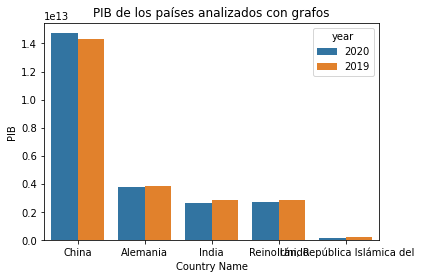

In [63]:
pib_graph_countries = df_pib_melted.loc[((df_pib_melted["Country Code"]=="CHN")|(df_pib_melted["Country Code"]=="IRN")|(df_pib_melted["Country Code"]=="IND")|(df_pib_melted["Country Code"]=="GBR")|(df_pib_melted["Country Code"]=="DEU"))&(df_pib_melted["year"]!="2018")].sort_values(by="PIB", ascending=False)
sns.barplot(data=pib_graph_countries, x="Country Name", y="PIB", hue="year")
plt.title("PIB de los países analizados con grafos")

In [93]:
c = ["CHN", "IRN", "IND", "DEU", "GBR"]
c1 = [["CHN", cof_real_CHI], ["IRN", cof_real_IRN], ["IND", cof_real_IND], ["DEU", cof_real_GER], ["GBR", cof_real_UK]]
# pib_avg_coeff = np.array([c1, columns=["Country Code", "clustering_coefficient"])
pib_avg_coeff = pd.DataFrame(data=c1, columns=["Country Code", "clustering_coefficient"])
pib_avg_coeff

,Country Code,clustering_coefficient
0,CHN,0.906002
1,IRN,0.877881
2,IND,0.912379
3,DEU,0.917290
4,GBR,0.912379


In [68]:
pib_graph_countries

,Country Name,Country Code,year,PIB
572,China,CHN,2020,1.472273e+13
306,China,CHN,2019,1.427994e+13
321,Alemania,DEU,2019,3.861124e+12
587,Alemania,DEU,2020,3.806060e+12
375,India,IND,2019,2.870504e+12
347,Reino Unido,GBR,2019,2.830814e+12
613,Reino Unido,GBR,2020,2.707744e+12
641,India,IND,2020,2.622984e+12
378,"Irán, República Islámica del",IRN,2019,2.582455e+11
644,"Irán, República Islámica del",IRN,2020,1.917183e+11


In [95]:
pib_clust_coef = pd.merge(pib_graph_countries, pib_avg_coeff, on="Country Code")
pib_clust_coef

,Country Name,Country Code,year,PIB,clustering_coefficient
0,China,CHN,2020,1.472273e+13,0.906002
1,China,CHN,2019,1.427994e+13,0.906002
2,Alemania,DEU,2019,3.861124e+12,0.917290
3,Alemania,DEU,2020,3.806060e+12,0.917290
4,India,IND,2019,2.870504e+12,0.912379
5,India,IND,2020,2.622984e+12,0.912379
6,Reino Unido,GBR,2019,2.830814e+12,0.912379
7,Reino Unido,GBR,2020,2.707744e+12,0.912379
8,"Irán, República Islámica del",IRN,2019,2.582455e+11,0.877881
9,"Irán, República Islámica del",IRN,2020,1.917183e+11,0.877881


<AxesSubplot:xlabel='Country Name', ylabel='PIB'>

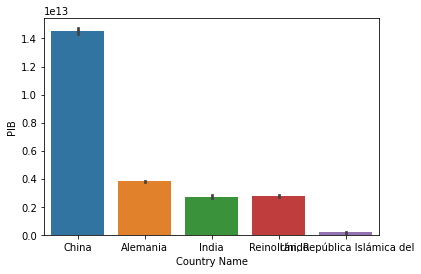

In [103]:
sns.barplot(data=pib_clust_coef, x="Country Name", y="PIB")

<AxesSubplot:xlabel='Country Name', ylabel='clustering_coefficient'>

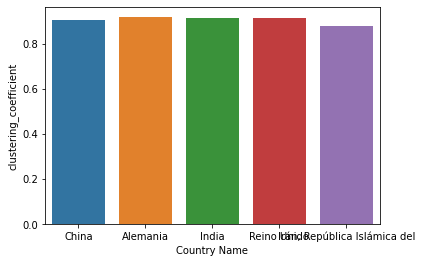

In [102]:
sns.barplot(data=pib_clust_coef, x="Country Name", y="clustering_coefficient")

<strong>Podemos observar que el gráfico de Clustering Coefficient no hay un cambio significativo entre países, mientras que en el gráfico de PIB, claramente se ve una gran diferencia entre países para el 2020. Por lo cual, podremos concluir que el clustering coefficient no se ve afectado por la situación económica del país como lo muestra el PIB. </strong>

## Continuación con grafos

### Pregunta 5: Si se hace un grafo por grupos de años de publicaciones de los keywords que co-ocurren en el dataset, ha cambiado ese grafo, hay cambios relacionados a la pandemia? 

### Análisis Grafo China

<strong>2019</strong>

In [30]:
keywords_CHI_edges_2019 = [] # Edges de Alemania
for k in df.loc[(df["published_country"]=="China")&(df["year"]==2019), "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_CHI_edges_2019 += list(combinations(k, 2))
keywords_CHI_edges_2019

[('evidence evaluation', 'evidence synthesis'),
 ('evidence evaluation', 'mild cognitive impairment'),
 ('evidence evaluation', 'nonpharmacological intervention'),
 ('evidence evaluation', 'systematic review methodology'),
 ('evidence synthesis', 'mild cognitive impairment'),
 ('evidence synthesis', 'nonpharmacological intervention'),
 ('evidence synthesis', 'systematic review methodology'),
 ('mild cognitive impairment', 'nonpharmacological intervention'),
 ('mild cognitive impairment', 'systematic review methodology'),
 ('nonpharmacological intervention', 'systematic review methodology'),
 ('abdominal massage', 'gastrointestinal function'),
 ('abdominal massage', 'gastrointestinal tract'),
 ('abdominal massage', 'icu'),
 ('abdominal massage', 'meta-analysis'),
 ('gastrointestinal function', 'gastrointestinal tract'),
 ('gastrointestinal function', 'icu'),
 ('gastrointestinal function', 'meta-analysis'),
 ('gastrointestinal tract', 'icu'),
 ('gastrointestinal tract', 'meta-analysis'),

In [33]:
keyword_graph_CHI_2019 = nx.Graph()
keyword_graph_CHI_2019.add_edges_from(keywords_CHI_edges_2019)
nx.write_gexf(keyword_graph_CHI_2019,"keywords_CHI_2019.gexf")

In [36]:
# Clustering coeficient
cof_real_CHI_2019 = nx.average_clustering(keyword_graph_CHI_2019)
print(f'Real: ', cof_real_CHI_2019)

Real:  0.9259462821893992


In [37]:
list_tuples_CHI_2019 = nx.betweenness_centrality(keyword_graph_CHI_2019, normalized=True).items()

In [38]:
sort_tuples_CHI_2019 = sorted(list_tuples_CHI_2019, key=lambda x: x[1], reverse=True)

In [40]:
for i in sort_tuples_CHI_2019[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

meta-analysis: 0.20583374148374659
systematic review: 0.051454683181564737
china: 0.05093023429952948
big data: 0.04796853379003524
machine learning: 0.04398983257082266
deep learning: 0.036255119884724615
bibliometrics: 0.02378527313359049
citespace: 0.022268057792981553
artificial intelligence: 0.0218016059508896
bibliometric analysis: 0.02118826378168405


<strong>2020</strong>

In [31]:
keywords_CHI_edges_2020 = [] # Edges de Alemania
for k in df.loc[(df["published_country"]=="China")&(df["year"]==2020), "authkeywords"].tolist():
    if pd.isna(k):
        continue
    k = [x.strip().lower() for x in k.split("|")]
    
    keywords_CHI_edges_2020 += list(combinations(k, 2))
keywords_CHI_edges_2020

[('computed tomography coronary angiography', 'coronary artery tortuosity'),
 ('computed tomography coronary angiography',
  'degree of coronary artery stenosis'),
 ('computed tomography coronary angiography', 'myocardial bridge'),
 ('coronary artery tortuosity', 'degree of coronary artery stenosis'),
 ('coronary artery tortuosity', 'myocardial bridge'),
 ('degree of coronary artery stenosis', 'myocardial bridge'),
 ('epidemiology', 'oesophageal disease'),
 ('epidemiology', 'public health'),
 ('oesophageal disease', 'public health'),
 ('cylindrical vector beams', 'data storage'),
 ('cylindrical vector beams', 'light-matter interaction'),
 ('cylindrical vector beams', 'optical multiplexing'),
 ('cylindrical vector beams', 'plasmonic nanostructures'),
 ('data storage', 'light-matter interaction'),
 ('data storage', 'optical multiplexing'),
 ('data storage', 'plasmonic nanostructures'),
 ('light-matter interaction', 'optical multiplexing'),
 ('light-matter interaction', 'plasmonic nanostr

In [35]:
keyword_graph_CHI_2020 = nx.Graph()
keyword_graph_CHI_2020.add_edges_from(keywords_CHI_edges_2020)
nx.write_gexf(keyword_graph_CHI_2020,"keywords_CHI_2020.gexf")

In [43]:
# Clustering coeficient
cof_real_CHI_2020 = nx.average_clustering(keyword_graph_CHI_2020)
print(f'Real: ', cof_real_CHI_2020)

Real:  0.9152259972887973


In [44]:
list_tuples_CHI_2020 = nx.betweenness_centrality(keyword_graph_CHI_2020, normalized=True).items()

In [45]:
sort_tuples_CHI_2020 = sorted(list_tuples_CHI_2020, key=lambda x: x[1], reverse=True)

In [46]:
for i in sort_tuples_CHI_2020[:10]:
  print('{0:4s}: {1:>}'.format(i[0], i[1]))

meta-analysis: 0.18801061050539705
big data: 0.07317846602644962
machine learning: 0.054879652902832886
data mining: 0.053386064455062214
deep learning: 0.05162811668833398
china: 0.041678010791306765
systematic review: 0.04041846173221223
covid-19: 0.03717052167882441
artificial intelligence: 0.02227624377588648
bibliometric analysis: 0.01634688839435912


## 2019:

- meta-analysis: 0.20583374148374659
- systematic review: 0.051454683181564737
- china: 0.05093023429952948
- big data: 0.04796853379003524
- machine learning: 0.04398983257082266
- deep learning: 0.036255119884724615
- bibliometrics: 0.02378527313359049
- citespace: 0.022268057792981553
- artificial intelligence: 0.0218016059508896
- bibliometric analysis: 0.02118826378168405

## 2020:

- meta-analysis: 0.18801061050539705
- big data: 0.07317846602644962
- machine learning: 0.054879652902832886
- data mining: 0.053386064455062214
- deep learning: 0.05162811668833398
- china: 0.041678010791306765
- systematic review: 0.04041846173221223
- covid-19: 0.03717052167882441
- artificial intelligence: 0.02227624377588648
- bibliometric analysis: 0.01634688839435912

<strong> Podemos observar que entre 2019 y 2020 el principal tema en el que se centran las investigaciones corresponde al Meta-analysis el cual se ha mantenido en el primer lugar para ambos años. Como se ha discutido antes es un tema que se encuentra bastante relacionado al ambito de salud y social, por lo que se puede deducir que la mayor parte de las investigaciones en China se enfocan en esa area. Sin embargo, bajando ciertos puestos en ese ranking podemos observar como la tematica de bibliometrics se ve desplazada del foco de investigaciones por temas de Epidemiologia y Covid-19. Este ligero cambio se puede interpretar como una consecuencia de los inicios de la pandemia, razon por la cual las investigaciones comienzan a girar en torno al tema del Covid-19<strong/>